<h1>PROJET CERTIFICATION : Analyses</h1>

In [1]:
# J'importe les librairies nécessaires:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

<h2>I- Importation des données</h2>

In [2]:
df_timeslots = pd.read_csv('C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/CertificationData/timeslots.csv')
df_timeslots.head()

,timeslot,season,day_night
0,2019-02-10T00:00:00,winter,night
1,2019-02-10T01:00:00,winter,night
2,2019-02-10T02:00:00,winter,night
3,2019-02-10T03:00:00,winter,night
4,2019-02-10T04:00:00,winter,night


In [3]:
df_production_fields = pd.read_csv('C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/CertificationData/production_fields.csv')
df_production_fields.head()

,production_field,CO2_tons_per_MWh
0,BIOMASS,0.988
1,FOSSIL_GAS,0.474
2,FOSSIL_HARD_COAL,0.986
3,FOSSIL_OIL,0.777
4,HYDRO_PUMPED_STORAGE,0.000


In [4]:
df_productions = pd.read_csv('C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/CertificationData/productions.csv')
df_productions.head()

,timeslot,production_field,production
0,2019-02-10T00:00:00,BIOMASS,348
1,2019-02-10T01:00:00,BIOMASS,347
2,2019-02-10T02:00:00,BIOMASS,347
3,2019-02-10T03:00:00,BIOMASS,347
4,2019-02-10T04:00:00,BIOMASS,347


In [5]:
df_users = pd.read_csv('C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/CertificationData/users_DB.csv', header=None)
df_users.columns = ['user_id', 'lastname','firstname','mail','password', 'number_people']
df_users

,user_id,lastname,firstname,mail,password,number_people
0,116,PEPIN-NEANG,Caroline,caroline.neang@gmail.com,mon_motdepasse,2


In [6]:
df_consumptions = pd.read_csv('C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/CertificationData/consumptions_fullDB.csv', header=None)
df_consumptions.columns = ['timeslot','user_id','consumption','carbon_footprint']
df_consumptions.head()

,timeslot,user_id,consumption,carbon_footprint
0,2019-02-10 00:00:00,116,68,2.400
1,2019-02-10 01:00:00,116,127,4.461
2,2019-02-10 02:00:00,116,50,1.788
3,2019-02-10 03:00:00,116,214,7.858
4,2019-02-10 04:00:00,116,119,4.443


In [7]:
# Sauvegarde
df_consumptions.to_csv('C:/Caroline/Pro Caro/DEVELOPPEUR/Projet certif Simplon 2019/Final/output/consumptions_fullDB.csv', index=False)

<h2>II- Analyses production</h2>

In [8]:
# Sous-ensemble du dataframe df_productions pour une date choisie et sans le stokage (car cette valeur peut être négative)
select_date = "2019-05-10T14:00:00"
subset_df_productions=df_productions.loc[(df_productions['timeslot']== select_date) & (df_productions['production']>= 0)]

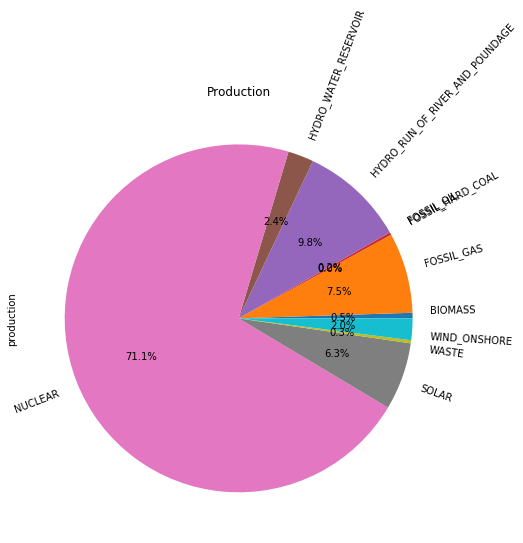

In [9]:
# Le camembert
productions_plot = subset_df_productions.plot.pie(y='production'
                                      ,figsize=(8, 8)
                                      ,labels=subset_df_productions['production_field']
                                      ,autopct='%1.1f%%'
                                      ,rotatelabels=True
                                      ,legend=False
                                      ,title= "Production")

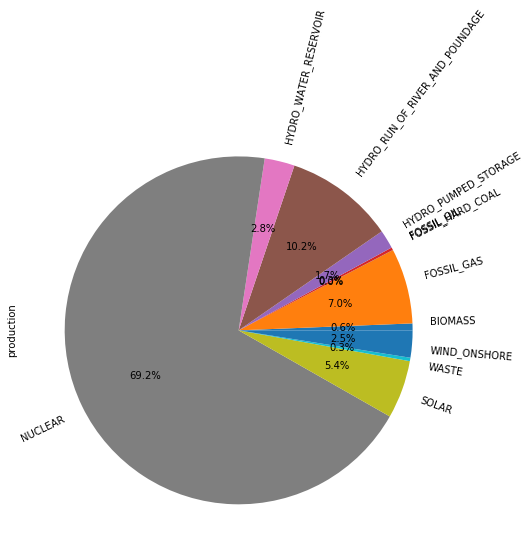

In [11]:
# Avec une autre date

select_date = "2019-06-14T14:00:00"

subset_df_productions = df_productions.loc[(df_productions['timeslot']== select_date) & (df_productions['production']>= 0)]

productions_plot = subset_df_productions.plot.pie(y='production'
                                      ,figsize=(8, 8)
                                      ,labels=subset_df_productions['production_field']
                                      ,autopct='%1.1f%%'
                                      ,rotatelabels=True
                                      ,legend=False
                                  )
cam= productions_plot.get_figure() 
cam.savefig("C:/Caroline/Pro Caro/DEVELOPPEUR/Projet certif Simplon 2019/Final/output/cam.png")

<h2>III- Analyses de consommation pour un utilisateur donné</h2>

<h3>A) Travail préparatoire</h3>

In [12]:
df_consumptions.head()

,timeslot,user_id,consumption,carbon_footprint
0,2019-02-10 00:00:00,116,68,2.400
1,2019-02-10 01:00:00,116,127,4.461
2,2019-02-10 02:00:00,116,50,1.788
3,2019-02-10 03:00:00,116,214,7.858
4,2019-02-10 04:00:00,116,119,4.443


In [13]:
# Je vérifie le types des colonnes du dataframe
df_consumptions.dtypes

timeslot             object
user_id               int64
consumption           int64
carbon_footprint    float64
dtype: object

In [14]:
# changer en DATETIME la colonne 'timeslot'
df_consumptions['timeslot'] = pd.to_datetime(df_consumptions['timeslot'])
df_consumptions.dtypes

timeslot            datetime64[ns]
user_id                      int64
consumption                  int64
carbon_footprint           float64
dtype: object

In [15]:
# Je merge les tables df_consumptions et df_users (même colonne user_id)
df_consumptions_users = pd.merge(df_consumptions, df_users)
df_consumptions_users.head()

,timeslot,user_id,consumption,carbon_footprint,lastname,firstname,mail,password,number_people
0,2019-02-10 00:00:00,116,68,2.400,PEPIN-NEANG,Caroline,caroline.neang@gmail.com,mon_motdepasse,2
1,2019-02-10 01:00:00,116,127,4.461,PEPIN-NEANG,Caroline,caroline.neang@gmail.com,mon_motdepasse,2
2,2019-02-10 02:00:00,116,50,1.788,PEPIN-NEANG,Caroline,caroline.neang@gmail.com,mon_motdepasse,2
3,2019-02-10 03:00:00,116,214,7.858,PEPIN-NEANG,Caroline,caroline.neang@gmail.com,mon_motdepasse,2
4,2019-02-10 04:00:00,116,119,4.443,PEPIN-NEANG,Caroline,caroline.neang@gmail.com,mon_motdepasse,2


In [16]:
# Choix de l'user
select_user = 116

In [17]:
# Sous-ensemble du dataframe df_consumptions pour un utilisateur choisi

subset_df_consumptions_users = df_consumptions_users.loc[(df_consumptions['user_id']== select_user)]
subset_df_consumptions_users.head()

,timeslot,user_id,consumption,carbon_footprint,lastname,firstname,mail,password,number_people
0,2019-02-10 00:00:00,116,68,2.400,PEPIN-NEANG,Caroline,caroline.neang@gmail.com,mon_motdepasse,2
1,2019-02-10 01:00:00,116,127,4.461,PEPIN-NEANG,Caroline,caroline.neang@gmail.com,mon_motdepasse,2
2,2019-02-10 02:00:00,116,50,1.788,PEPIN-NEANG,Caroline,caroline.neang@gmail.com,mon_motdepasse,2
3,2019-02-10 03:00:00,116,214,7.858,PEPIN-NEANG,Caroline,caroline.neang@gmail.com,mon_motdepasse,2
4,2019-02-10 04:00:00,116,119,4.443,PEPIN-NEANG,Caroline,caroline.neang@gmail.com,mon_motdepasse,2


<h3> B) Graphiques consommation par mois</h3>

In [18]:
# Je réduis le df pour prendre en compte que les colonnes nécessaires 'consumption' et 'carbon_footprint'
sub2set_df_consumptions_users = subset_df_consumptions_users[['timeslot','consumption', 'carbon_footprint']]
sub2set_df_consumptions_users.head()

,timeslot,consumption,carbon_footprint
0,2019-02-10 00:00:00,68,2.400
1,2019-02-10 01:00:00,127,4.461
2,2019-02-10 02:00:00,50,1.788
3,2019-02-10 03:00:00,214,7.858
4,2019-02-10 04:00:00,119,4.443


<h4>1- Consommation par user (foyer)</h4>

In [19]:
# Création d'un dataframe pour un user donné pour chaque mois
sub2set_df_consumptions_users_monthly=sub2set_df_consumptions_users.groupby([subset_df_consumptions_users['timeslot'].dt.month]).sum()
sub2set_df_consumptions_users_monthly

,consumption,carbon_footprint
timeslot,,
2,194483,11027.904
3,333202,13237.703
4,291230,10357.377
5,259678,8020.902
6,225934,6834.770
7,107190,4181.583


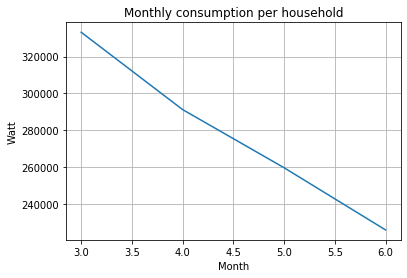

In [23]:
# Graphique consommation mensuelle pour un utilisateur donné (foyer)

## Data for plotting
t = sub2set_df_consumptions_users_monthly.index[1:-1] ### Je prends en compte que les mois pleins, j'enlève Février et Juillet
s = sub2set_df_consumptions_users_monthly['consumption'][1:-1] ### Je ne prends en compte que les mois pleins

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='Month', ylabel='Watt',
       title='Monthly consumption per household')
ax.grid()

fig.savefig("C:/Caroline/Pro Caro/DEVELOPPEUR/Projet certif Simplon 2019/Final/output/monthly_consumption.png")
plt.show()

<h4>2- Consommation par personne pour un user (foyer) donné</h4>

In [26]:
#Je cherche l'index de la ligne de l'utilisateur
idx=df_users[df_users['user_id']== select_user].index.item()

In [27]:
# Création d'un dataframe des consommations et émissions de CO² par personne dans un foyer donné
sub2set_df_consumptions_users_monthly_pers = sub2set_df_consumptions_users_monthly / (subset_df_consumptions_users['number_people'][idx])
sub2set_df_consumptions_users_monthly_pers

,consumption,carbon_footprint
timeslot,,
2,97241.5,5513.9520
3,166601.0,6618.8515
4,145615.0,5178.6885
5,129839.0,4010.4510
6,112967.0,3417.3850
7,53595.0,2090.7915


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/x/Documents/Projet simplon/Certification Data/Présentation finale/monthly_consumption_pers.png'

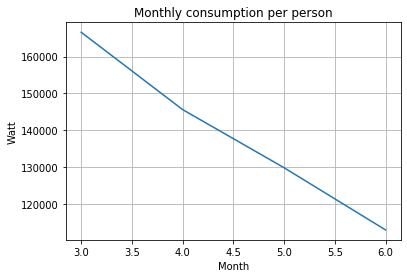

In [28]:
# Graphique consommation mensuelle par personne d'un foyer donné

## Data for plotting
t = sub2set_df_consumptions_users_monthly_pers.index[1:-1] ### Je prends en compte que les mois pleins, j'enlève Février et Juillet
s = sub2set_df_consumptions_users_monthly_pers['consumption'][1:-1] ### Je ne prends en compte que les mois pleins

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='Month', ylabel='Watt',
       title='Monthly consumption per person')
ax.grid()

fig.savefig("C:/Users/x/Documents/Projet simplon/Certification Data/Présentation finale/monthly_consumption_pers.png")
plt.show()

<h3>B) Graphique consommation hebodomadaire</h3>

<h4>1- Consommation hebdomadaire pour un user (foyer) donné</h4>

In [29]:
# Création d'un dataframe pour un user donné pour chaque semaine
sub2set_df_consumptions_users_weekly=sub2set_df_consumptions_users.groupby([subset_df_consumptions_users['timeslot'].dt.week]).sum()
sub2set_df_consumptions_users_weekly.head()

,consumption,carbon_footprint
timeslot,,
6,8928,303.877
7,85278,4837.689
8,57107,3345.272
9,87556,4235.694
10,79385,2527.910


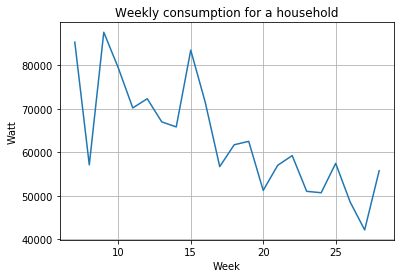

In [31]:
# Graphique consommation hebdomadaire pour un utilisateur donné (foyer)

## Data for plotting
t = sub2set_df_consumptions_users_weekly.index[1:-1] ### Je prends en compte que les mois pleins, j'enlève Février et Juillet
s = sub2set_df_consumptions_users_weekly['consumption'][1:-1] ### Je ne prends en compte que les mois pleins

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='Week', ylabel='Watt',
       title='Weekly consumption for a household')
ax.grid()

fig.savefig("C:/Caroline/Pro Caro/DEVELOPPEUR/Projet certif Simplon 2019/Final/output/weekly_consumption.png")
plt.show()

<h4>2- Consommation hebdomadaire par personne  pour un user (foyer) donné</h4>

In [32]:
# Création d'un dataframe hebdomadaire des consommations et émissions de CO² par personne dans un foyer donné
sub2set_df_consumptions_users_weekly_pers = sub2set_df_consumptions_users_weekly / (subset_df_consumptions_users['number_people'][idx])
sub2set_df_consumptions_users_weekly_pers.head()

,consumption,carbon_footprint
timeslot,,
6,4464.0,151.9385
7,42639.0,2418.8445
8,28553.5,1672.6360
9,43778.0,2117.8470
10,39692.5,1263.9550


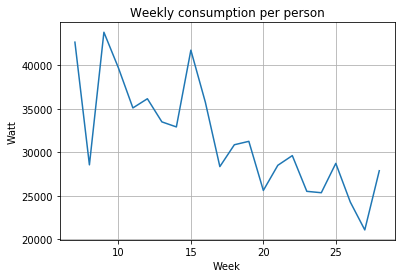

In [34]:
# Graphique consommation hebdomadaire par personne pour un utilisateur donné (foyer)

## Data for plotting
t = sub2set_df_consumptions_users_weekly_pers.index[1:-1] ### Je prends en compte que les mois pleins, j'enlève Février et Juillet
s = sub2set_df_consumptions_users_weekly_pers['consumption'][1:-1] ### Je ne prends en compte que les mois pleins

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='Week', ylabel='Watt',
       title='Weekly consumption per person')
ax.grid()

fig.savefig("C:/Caroline/Pro Caro/DEVELOPPEUR/Projet certif Simplon 2019/Final/output/weekly_consumption_pers.png")
plt.show()

<h2>III- Analyse de l'empreinte carbone pour un utilisateur donné</h2>

In [35]:
# Création d'un dataframe pour un user donné cumulé pour chaque mois
sub3set_df_consumptions_users_weekly=sub2set_df_consumptions_users.groupby([subset_df_consumptions_users['timeslot'].dt.week]).sum()
sub4set_df_consumptions_users_weekly=sub3set_df_consumptions_users_weekly.cumsum()

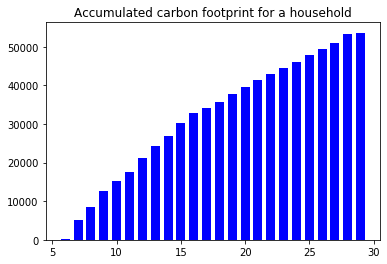

In [36]:
fig = plt.figure()

x = sub3set_df_consumptions_users_weekly.index.tolist()
height = sub4set_df_consumptions_users_weekly['carbon_footprint'].tolist()
width = 0.7
plt.title('Accumulated carbon footprint for a household')
plt.bar(x, height, width, color='b' )

plt.savefig('C:/Caroline/Pro Caro/DEVELOPPEUR/Projet certif Simplon 2019/Final/output/weekly_footprint_household.png')
plt.show()